In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [279]:
sns.set(
    font_scale = 2,
    style = "whitegrid",
    rc = {"figure.figsize" : (20,7)}
)

In [280]:
# таблица с уникальными идентификаторами пользователей
df_customers = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-bogdanov/olist_customers_dataset.csv")

customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

In [281]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [282]:
df_customers.shape

(99441, 5)

In [283]:
# таблица заказов
df_orders = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-bogdanov/olist_orders_dataset.csv")

order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

In [284]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [285]:
# товарные позиции, входящие в заказы
df_order_items = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-bogdanov/olist_order_items_dataset.csv")

order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

In [286]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [287]:
df_order_items.order_item_id.value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

# Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

1.Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

2.Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

3.По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

4.Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

5.Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (15 баллов)

6.Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (23 балла)

# 1.Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) - работа с df_orders

order_id — уникальный идентификатор заказа (номер чека)

customer_id — позаказный идентификатор пользователя

order_status — статус заказа

order_purchase_timestamp — время создания заказа

order_approved_at — время подтверждения оплаты заказа

order_delivered_carrier_date — время передачи заказа в логистическую службу

order_delivered_customer_date — время доставки заказа

order_estimated_delivery_date — обещанная дата доставки

In [288]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [289]:
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

доставлено 96478

отправлено 1107

отменено 625

недоступно 609

выставлено счетов 314

обработка 301

создано 5

одобрено 2

In [290]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [291]:
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders.order_purchase_timestamp)
df_orders["order_approved_at"] = pd.to_datetime(df_orders.order_approved_at)
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders.order_delivered_carrier_date)
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders.order_delivered_customer_date)
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders.order_estimated_delivery_date)
df_order_items["shipping_limit_date"] = pd.to_datetime(df_order_items.shipping_limit_date)

In [292]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [293]:
df_orders["time_between_create_and_approve"] = df_orders.order_approved_at - df_orders.order_purchase_timestamp

In [294]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0 days 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54


In [295]:
df_orders.query("time_between_create_and_approve != 'NaT' & order_status != 'canceled'").time_between_create_and_approve.sort_values(ascending=False)

47552   187 days 21:10:50
62293    60 days 10:51:59
4541     32 days 16:02:44
43697    32 days 12:51:18
96251    30 days 21:26:37
               ...       
33561     0 days 00:00:00
82757     0 days 00:00:00
82762     0 days 00:00:00
33596     0 days 00:00:00
60487     0 days 00:00:00
Name: time_between_create_and_approve, Length: 98797, dtype: timedelta64[ns]

доставлено + отправлено + выставлено счетов + одобрено

In [296]:
96478 + 1107 + 314 + 2

97901

In [297]:
df_orders.query("order_status == 'invoiced'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2 days 01:03:09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,3 days 12:30:32
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28,0 days 00:14:49
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06,0 days 00:10:24
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20,0 days 00:23:17
...,...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaT,NaT,2017-12-18,0 days 03:38:37
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,NaT,2018-06-05,0 days 00:26:09
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15,0 days 03:07:33
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaT,NaT,2018-08-17,0 days 00:13:31


# Процесс покупки включает в себя выбор товара, оплату и получение товара, получаем, что покупка - это доставленный товар!!!

In [298]:
df_orders.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   160
order_delivered_carrier_date       1783
order_delivered_customer_date      2965
order_estimated_delivery_date         0
time_between_create_and_approve     160
dtype: int64

In [299]:
df_orders.query("time_between_create_and_approve != 'NaT' & order_status == 'delivered'").groupby("customer_id", as_index=False) \
    .agg({"order_id" : "count"}).rename(columns={"order_id" : "buycount"}) \
    .sort_values("buycount", ascending=False)

,customer_id,buycount
0,00012a2ce6f8dcda20d059ce98491703,1
64306,aa5e567592c7fce76e3937e35c6a4ecb,1
64315,aa62a16b10e3fb24ecdefd7e4dc3fa65,1
64314,aa625e70d5e95d9b5c2c24e78fa0d75c,1
64313,aa6190994371836fc1d4596edd827abd,1
...,...,...
32152,5585bc3f707bf7755cc669076c92b15d,1
32151,55858b24b1b18a4e50fce22b11a761bf,1
32150,5584b1ace8b18cc156ce51b989fd2958,1
32149,558499c2027ec01d530fb975ce2e5b2f,1


In [300]:
df_orders.shape

(99441, 9)

In [301]:
df_orders.customer_id.value_counts()

2e2534a17bfa1b56a16d51f7514c5370    1
9eeb9bad5f4f3f5644ff026e461108a5    1
1b9926221e65a2fb5b82b1dc60fa866a    1
2205062cf6fcb1d20614d865945329da    1
f4351b806df6ba3f5c1d0453de0d3b7c    1
                                   ..
04f9573f711359386b4fed690f57cd11    1
b7f33df2257f0341d8bdf7274e20ac95    1
a81f98f9ecc7838dd8e9853eee3be318    1
6a7350848787b437fddcf8b2ca19dfd1    1
3e9fc594a0a79ea460dca4a70d95645e    1
Name: customer_id, Length: 99441, dtype: int64

# Позаказный индекс у каждого заказа индентичен, нужно объединить df_orders и df_customers

In [302]:
merge_orders_customers = df_orders.merge(df_customers, how='inner', on='customer_id')

In [303]:
merge_orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [304]:
merge_orders_customers.query("order_delivered_customer_date != 'NaT' & time_between_create_and_approve != 'NaT' & order_status != 'canceled'").groupby('customer_unique_id', as_index=False)  \
            .agg({'customer_id':'count'}).sort_values("customer_id", ascending=False)

,customer_unique_id,customer_id
51421,8d50f5eadf50201ccdcedfb9e2ac8455,15
22774,3e43e6105506432c953e165fb2acf44c,9
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,7
36700,6469f99c1f9dfae7733b25662e7f1782,7
73906,ca77025e7201e3b30c44b472ff346268,7
...,...,...
31557,5657dfebff5868c4dc7e8355fea865c4,1
31556,5657596addb4d7b07b32cd330614bdf8,1
31555,5656eb169546146caeab56c3ffc3d268,1
31554,5656a8fabc8629ff96b2bc14f8c09a27,1


In [305]:
merge_orders_customers.query("order_delivered_customer_date != 'NaT' & time_between_create_and_approve != 'NaT' & order_status != 'canceled'").groupby('customer_unique_id', as_index=False)  \
            .agg({'customer_id':'count'}).query("customer_id == 1").customer_id.sum()

90537

In [306]:
merge_orders_customers.query("order_delivered_customer_date != 'NaT' & time_between_create_and_approve == 'NaT'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,NaT,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,NaT,91efb7fcabc17925099dced52435837f,93548,novo hamburgo,RS
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,NaT,e1f01a1bd6485e58ad3c769a5427d8a8,8230,sao paulo,SP
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,NaT,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,NaT,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,NaT,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,NaT,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,NaT,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,NaT,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,NaT,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG


# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)# 

In [307]:
merge_orders_customers.query("order_status == 'unavailable' or order_status == 'canceled'") \
    .groupby("order_status", as_index=False) \
    .agg({"customer_id" : "count"})

,order_status,customer_id
0,canceled,625
1,unavailable,609


доставлено 96478

отправлено 1107

отменено 625

недоступно 609

выставлено счетов 314

обработка 301

создано 5

одобрено 2

Рассматриваем delivered, canceled, unavailable

In [308]:
# canceled - отмененные заказы
merge_orders_customers.query("order_delivered_customer_date == 'NaT' & order_status == 'canceled'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2 days 13:40:59,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,0 days 00:24:31,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,0 days 00:15:56,11c3d6c93dea6ce86769a4835c171bd9,87013,maringa,PR
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,NaT,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,NaT,08642cd329066fe11ec63293f714f2f8,33030,santa luzia,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30,0 days 00:00:00,78a159045124eb7601951b917a42034f,89111,gaspar,SC
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,NaT,13d7bd0b05e18b00f415221b3bb69348,9810,sao bernardo do campo,SP
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27,0 days 00:08:57,0f75924cbbe60142068f4029d744b724,82310,curitiba,PR
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaT,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP


In [309]:
df_canceled = merge_orders_customers.query("order_delivered_customer_date == 'NaT' & order_status == 'canceled'")

In [310]:
# unvailable - недоступные заказы
merge_orders_customers.query("order_delivered_customer_date == 'NaT' & order_status == 'unavailable'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,0 days 00:17:29,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0 days 02:52:13,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2 days 06:37:16,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,0 days 11:47:05,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,0 days 04:37:17,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27,1 days 16:18:55,9004096d8ffc515d4189e661fc4bcb84,3759,sao paulo,SP
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,0 days 00:06:13,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,0 days 13:09:35,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,4 days 23:16:43,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ


In [311]:
merge_orders_customers.query("order_delivered_customer_date == 'NaT' & time_between_create_and_approve == 'NaT' & order_status == 'unavailable'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


Отсутствуют неоплаченные заказы - нужно смотреть на  максимальную дату доставки продавцом для передачи заказа партнеру по логистике, некоторые заказы могут быть доставлены вовремя, требуется объединить с df_order_items по order_id

In [312]:
merge_orders_customers_order_items = merge_orders_customers.merge(df_order_items, how='left', on='order_id')

In [313]:
df_order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [314]:
merge_orders_customers_order_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [315]:
# Отсутствует срок максимальной доставки продавцом для передачи заказа партнеру по логистике или максимальная дата доставки больше чем обещанная дата доставки
merge_orders_customers_order_items.query("order_delivered_customer_date == 'NaT' & order_status == 'unavailable' & (shipping_limit_date == 'NaT' | shipping_limit_date > order_estimated_delivery_date)")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,0 days 00:17:29,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,NaN,NaN,NaN,NaT,NaN,NaN
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0 days 02:52:13,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,NaN,NaN,NaN,NaT,NaN,NaN
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2 days 06:37:16,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,NaN,NaN,NaN,NaT,NaN,NaN
850,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,0 days 11:47:05,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,NaN,NaN,NaN,NaT,NaN,NaN
1326,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,0 days 04:37:17,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113090,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27,1 days 16:18:55,9004096d8ffc515d4189e661fc4bcb84,3759,sao paulo,SP,NaN,NaN,NaN,NaT,NaN,NaN
113184,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,0 days 00:06:13,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP,NaN,NaN,NaN,NaT,NaN,NaN
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,0 days 13:09:35,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaN,NaN,NaT,NaN,NaN
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,4 days 23:16:43,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN,NaN,NaN,NaT,NaN,NaN


In [316]:
df_unvailable = merge_orders_customers_order_items.query("order_delivered_customer_date == 'NaT' & order_status == 'unavailable' & (shipping_limit_date == 'NaT' | shipping_limit_date > order_estimated_delivery_date)")

In [317]:
pd.options.mode.chained_assignment = None
df_unvailable["year_month_estimated"] = df_unvailable["order_estimated_delivery_date"].dt.to_period("M")

In [318]:
df_unvailable

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year_month_estimated
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,0 days 00:17:29,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,NaN,NaN,NaN,NaT,NaN,NaN,2017-12
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0 days 02:52:13,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,NaN,NaN,NaN,NaT,NaN,NaN,2018-02
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2 days 06:37:16,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,NaN,NaN,NaN,NaT,NaN,NaN,2017-09
850,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,0 days 11:47:05,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,NaN,NaN,NaN,NaT,NaN,NaN,2018-02
1326,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,0 days 04:37:17,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,NaN,NaN,NaN,NaT,NaN,NaN,2017-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113090,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27,1 days 16:18:55,9004096d8ffc515d4189e661fc4bcb84,3759,sao paulo,SP,NaN,NaN,NaN,NaT,NaN,NaN,2017-10
113184,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,0 days 00:06:13,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP,NaN,NaN,NaN,NaT,NaN,NaN,2018-01
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,0 days 13:09:35,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaN,NaN,NaT,NaN,NaN,2018-02
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,4 days 23:16:43,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN,NaN,NaN,NaT,NaN,NaN,2017-09


In [319]:
pd.options.mode.chained_assignment = None
df_canceled["year_month_estimated"] = df_canceled["order_estimated_delivery_date"].dt.to_period("M")

In [320]:
df_canceled

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month_estimated
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2 days 13:40:59,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP,2018-08
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,0 days 00:24:31,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,2018-02
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,0 days 00:15:56,11c3d6c93dea6ce86769a4835c171bd9,87013,maringa,PR,2018-02
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,NaT,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,2018-09
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,NaT,08642cd329066fe11ec63293f714f2f8,33030,santa luzia,MG,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30,0 days 00:00:00,78a159045124eb7601951b917a42034f,89111,gaspar,SC,2017-03
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,NaT,13d7bd0b05e18b00f415221b3bb69348,9810,sao bernardo do campo,SP,2018-08
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27,0 days 00:08:57,0f75924cbbe60142068f4029d744b724,82310,curitiba,PR,2017-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaT,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,2018-10


In [321]:
# количество недоставленных заказов по причине отмены в среднем за месяц
df_canceled.groupby("year_month_estimated", as_index=False) \
    .agg({"order_id" : "count"}).order_id.mean().round()

24.0

In [322]:
# количество недоставленных заказов по причине отсутствия максимальной доставки продавцом для передачи заказа партнеру по логистике 
# или превышения обещанной даты доставки в среднем за месяц
df_unvailable.groupby("year_month_estimated", as_index=False) \
    .agg({"order_id" : "count"}).order_id.mean().round()

30.0

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [323]:
merge_orders_customers_order_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [324]:
merge_orders_customers_order_items["WeekDay"] = merge_orders_customers_order_items["order_purchase_timestamp"].dt.day_name()

In [325]:
# В какой день товар чаще все покупался
merge_orders_customers_order_items.groupby(["product_id", "WeekDay"], as_index=False) \
    .agg({"order_id" : "count"}).rename(columns={"order_id" : "BuyPerDay"}).sort_values(["BuyPerDay", "product_id"], ascending=False) \
    .groupby("product_id").head(1)

,product_id,WeekDay,BuyPerDay
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
20127,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13537,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1


In [326]:
df_weekday_max = merge_orders_customers_order_items.groupby(["product_id", "WeekDay"], as_index=False) \
    .agg({"order_id" : "count"}).rename(columns={"order_id" : "BuyPerDay"}).sort_values(["BuyPerDay", "product_id"], ascending=False).groupby("product_id").head(1)

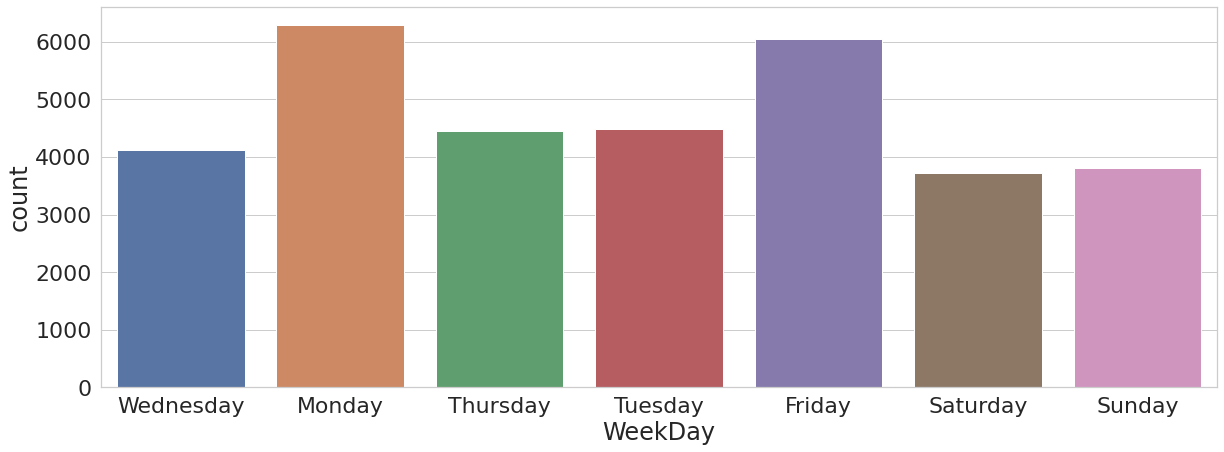

In [327]:
# Максимальные покупки
sns.countplot(data=df_weekday_max, x=df_weekday_max["WeekDay"])

In [328]:
# Количество покупок
df_weekday_count = merge_orders_customers_order_items.groupby(["product_id", "WeekDay"], as_index=False) \
    .agg({"order_id" : "count"})

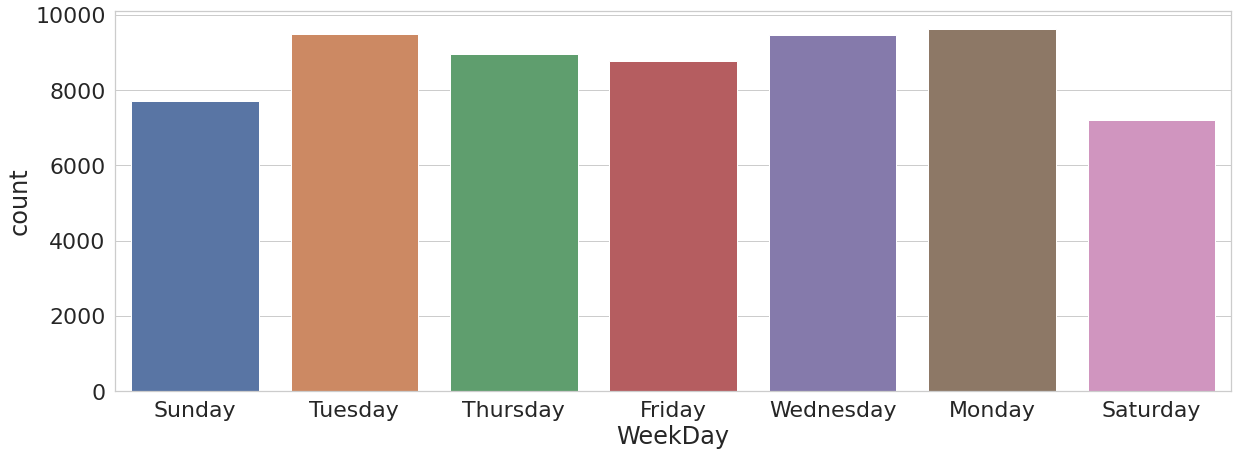

In [329]:
sns.countplot(data=df_weekday_count, x=df_weekday_count["WeekDay"])

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [330]:
df_count_buy_per_week = merge_orders_customers_order_items.query("order_delivered_customer_date != 'NaT' & order_status != 'canceled'")

In [331]:
df_count_buy_per_week

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,WeekDay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday


In [332]:
df_count_buy_per_week["month_delivered"] = df_count_buy_per_week.order_delivered_customer_date.dt.month_name()
df_count_buy_per_week["week_in_month_delivered"] = df_count_buy_per_week.order_delivered_customer_date.dt.days_in_month / 7

In [333]:
df_count_buy_per_week

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,WeekDay,month_delivered,week_in_month_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,...,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday,October,4.428571
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,...,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday,August,4.428571
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,...,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday,August,4.428571
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,7c142cf63193a1473d2e66489a9ae977,...,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday,December,4.428571
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,72632f0f9dd73dfee390c9b22eb56dd6,...,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday,February,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,da62f9e57a76d978d02ab5362c509660,...,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday,February,4.000000
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,737520a9aad80b3fbbdad19b66b37b30,...,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday,September,4.285714
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,...,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday,January,4.428571
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,...,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday,January,4.428571


In [334]:
#подсчет покупок в месяц по покупателю, заказу, месяцу с учетом повторяющихся месяцев в разные годы (также используем week_in_month_delivered)
df_count_buy_per_week.groupby(['customer_unique_id', 'order_id', 'month_delivered', 'week_in_month_delivered'], as_index=False) \
                            .agg({'product_id':'count'})  \
                            .rename(columns={'product_id':'count_month_buy'})

,customer_unique_id,order_id,month_delivered,week_in_month_delivered,count_month_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,May,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,May,4.428571,1
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,April,4.285714,1
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,November,4.285714,1
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,November,4.285714,1
...,...,...,...,...,...
96465,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,July,4.428571,2
96466,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,January,4.428571,1
96467,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,February,4.000000,1
96468,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,May,4.428571,1


In [335]:
df_count_by_week = df_count_buy_per_week.groupby(['customer_unique_id', 'order_id', 'month_delivered', 'week_in_month_delivered'], as_index=False) \
                            .agg({'product_id':'count'})  \
                            .rename(columns={'product_id':'count_month_buy'})

In [336]:
df_count_by_week["count_week_buy"] = df_count_by_week.count_month_buy / df_count_by_week.week_in_month_delivered

In [337]:
df_count_by_week

,customer_unique_id,order_id,month_delivered,week_in_month_delivered,count_month_buy,count_week_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,May,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,May,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,April,4.285714,1,0.233333
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,November,4.285714,1,0.233333
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,November,4.285714,1,0.233333
...,...,...,...,...,...,...
96465,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,July,4.428571,2,0.451613
96466,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,January,4.428571,1,0.225806
96467,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,February,4.000000,1,0.250000
96468,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,May,4.428571,1,0.225806


In [369]:
# Количество покупок в неделю для каждого пользователя по месяцам
df_count_by_week.groupby(["customer_unique_id", "month_delivered"], as_index=False) \
    .agg({"count_week_buy" : "mean"})

,customer_unique_id,month_delivered,count_week_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,May,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,0.225806
2,0000f46a3911fa3c0805444483337064,April,0.233333
3,0000f6ccb0745a6a4b88665a16c9f078,November,0.233333
4,0004aac84e0df4da2b147fca70cf8255,November,0.233333
...,...,...,...
95267,fffcf5a5ff07b0908bd4e2dbc735a684,July,0.451613
95268,fffea47cd6d3cc0a88bd621562a9d061,January,0.225806
95269,ffff371b4d645b6ecea244b27531430a,February,0.250000
95270,ffff5962728ec6157033ef9805bacc48,May,0.225806


In [339]:
# Средние покупки в неделю по месяцам и barplot для визуализации
df_count_by_week.groupby("month_delivered", as_index=False) \
    .agg({"count_week_buy" : "mean"})

,month_delivered,count_week_buy
0,April,0.266340
1,August,0.255679
2,December,0.260700
3,February,0.284266
4,January,0.254196
5,July,0.255447
6,June,0.267572
7,March,0.261740
8,May,0.257093
9,November,0.270643


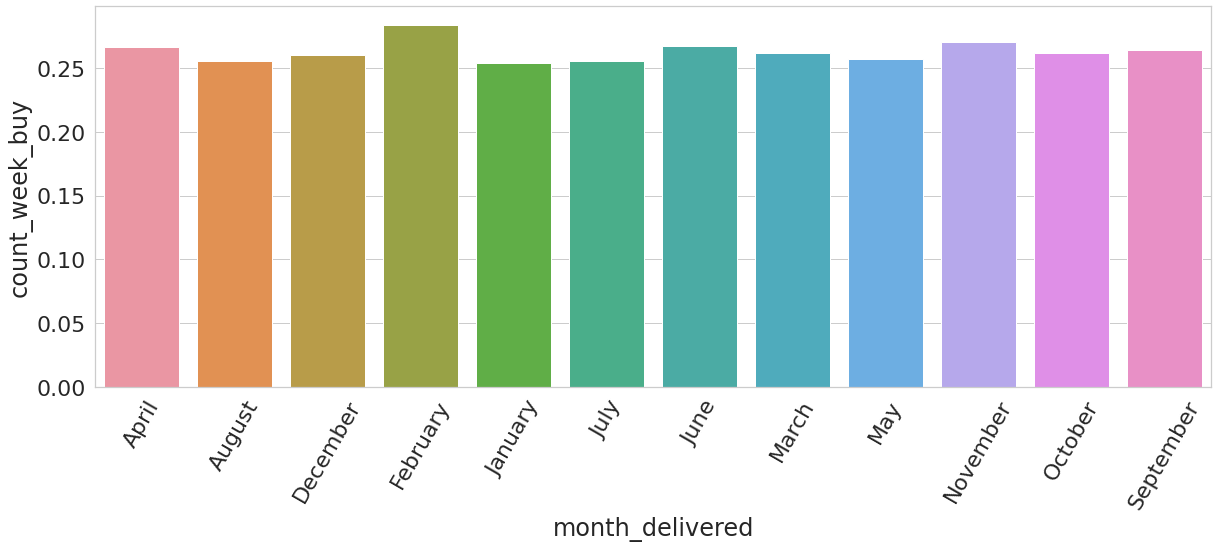

In [340]:
plt.xticks(rotation=60)
sns.barplot(data=df_count_by_week.groupby("month_delivered", as_index=False) \
    .agg({"count_week_buy" : "mean"}), x="month_delivered", y="count_week_buy")

# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. (15 баллов)

Retention — это метрика, отвечающая на вопрос, сколько людей вернулись в день Х (неделю Х, месяц Х) после первого входа в продукт. Retention измеряется в процентах, то есть показывает долю вернувшихся людей от изначально пришедших.

In [341]:
df_cohort_analysis = merge_orders_customers_order_items.query("order_delivered_customer_date != 'NaT' & order_status != 'canceled'")

In [342]:
df_cohort_analysis

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_between_create_and_approve,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,WeekDay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday


In [343]:
df_cohort_analysis["year_month_estimated"] = df_cohort_analysis["order_delivered_customer_date"].dt.strftime('%Y-%m')

In [344]:
# количество уникальных покупателей, совершавших покупки, по месяцам, отталкиваясь от этого будем считать retention
df_cohort_analysis.groupby("year_month_estimated", as_index=False) \
    .agg({"customer_unique_id" : "count"}) \
    .rename(columns={"customer_unique_id" : "count_unique_customers_per_month"}) \
    .sort_values("year_month_estimated")

,year_month_estimated,count_unique_customers_per_month
0,2016-10,241
1,2016-11,72
2,2016-12,4
3,2017-01,326
4,2017-02,1565
5,2017-03,2724
6,2017-04,2072
7,2017-05,4201
8,2017-06,3640
9,2017-07,3933


In [345]:
visualisation = df_cohort_analysis.groupby("year_month_estimated", as_index=False) \
    .agg({"customer_unique_id" : "count"}) \
    .rename(columns={"customer_unique_id" : "count_unique_customers_per_month"}) \
    .sort_values("year_month_estimated")

In [370]:
fig = px.line(visualisation, x="year_month_estimated", y="count_unique_customers_per_month", title='Count_unique_customers_per_month')
fig.show()

In [347]:
# первая покупка пользователя
df_first_buy = df_cohort_analysis.groupby("customer_unique_id", as_index=False) \
    .agg({'order_delivered_customer_date': 'min'}) \
    .rename(columns={'order_delivered_customer_date':'first_buy'})

In [348]:
df_first_buy["first_buy"] = df_first_buy.first_buy.dt.strftime('%Y-%m')

In [349]:
df_first_buy

,customer_unique_id,first_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-04
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,2017-07
93346,fffea47cd6d3cc0a88bd621562a9d061,2018-01
93347,ffff371b4d645b6ecea244b27531430a,2017-02
93348,ffff5962728ec6157033ef9805bacc48,2018-05


In [350]:
# объединение таблиц
merge_cahort_first_buy = df_cohort_analysis.merge(df_first_buy, on="customer_unique_id", how="inner")

In [351]:
df_pre_cahorts = merge_cahort_first_buy[['customer_unique_id', 'year_month_estimated', 'first_buy']]

In [352]:
# добавим количество пользователей совершивших покупку по первому месяцу
df_pre_cahorts

,customer_unique_id,year_month_estimated,first_buy
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,2017-09,2017-09
2,af07308b275d755c9edb36a90c618231,2018-08,2018-08
3,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
4,7c142cf63193a1473d2e66489a9ae977,2017-12,2017-12
...,...,...,...
110184,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02
110185,737520a9aad80b3fbbdad19b66b37b30,2017-09,2017-09
110186,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01
110187,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01


In [353]:
sum_user=df_pre_cahorts.groupby('first_buy', as_index=False)  \
                    .agg({'customer_unique_id':'nunique'})  \
                    .rename(columns={'customer_unique_id':'count_buys_from_first_month'})

In [354]:
sum_user

,first_buy,count_buys_from_first_month
0,2016-10,203
1,2016-11,57
2,2016-12,4
3,2017-01,263
4,2017-02,1325
5,2017-03,2344
6,2017-04,1804
7,2017-05,3673
8,2017-06,3124
9,2017-07,3355


In [355]:
# объединим таблицы
df_sum_pre_cahorts=df_pre_cahorts.merge(sum_user, how='left', on='first_buy')

In [356]:
df_sum_pre_cahorts

,customer_unique_id,year_month_estimated,first_buy,count_buys_from_first_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09,3832
1,7c396fd4830fd04220f754e42b4e5bff,2017-09,2017-09,3832
2,af07308b275d755c9edb36a90c618231,2018-08,2018-08,8046
3,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08,8046
4,7c142cf63193a1473d2e66489a9ae977,2017-12,2017-12,6968
...,...,...,...,...
110184,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02,5648
110185,737520a9aad80b3fbbdad19b66b37b30,2017-09,2017-09,3832
110186,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01,6401
110187,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01,6401


In [357]:
# группируем данные по first_buy - когорты , year_month_estimated - период когорты.

cohorts=df_sum_pre_cahorts.groupby(['first_buy', 'year_month_estimated'])  \
                .agg({'customer_unique_id':'nunique', 'count_buys_from_first_month':'max'})  \
                .rename(columns={'customer_unique_id': 'users_of_cohorts', "count_buys_from_first_month" : "users_from_start_cohort"})

# будем рассматривать когорты только за 2017 год плюс 3 месяца 2018, чтобы отследить CRR на третий месяц
cohorts=cohorts.query('"2016-12" < first_buy < "2018-01" and year_month_estimated < "2018-04"')

In [358]:
cohorts

users_of_cohorts  users_from_start_cohort
first_buy year_month_estimated                                           
2017-01   2017-01                            263                      263
          2017-02                              3                      263
          2017-03                              1                      263
          2017-05                              1                      263
          2017-06                              1                      263
...                                          ...                      ...
2017-11   2018-03                              8                     4521
2017-12   2017-12                           6968                     6968
          2018-01                             36                     6968
          2018-02                             17                     6968
          2018-03                             17                     6968

[110 rows x 2 columns]

In [359]:
cohorts.reset_index(inplace=True)

In [360]:
cohorts

,first_buy,year_month_estimated,users_of_cohorts,users_from_start_cohort
0,2017-01,2017-01,263,263
1,2017-01,2017-02,3,263
2,2017-01,2017-03,1,263
3,2017-01,2017-05,1,263
4,2017-01,2017-06,1,263
...,...,...,...,...
105,2017-11,2018-03,8,4521
106,2017-12,2017-12,6968,6968
107,2017-12,2018-01,36,6968
108,2017-12,2018-02,17,6968


# Retention
Взять число новых пользователей в Day 0 (день, когда группа пользователей пришла);

Взять число активных пользователей в Day N (интересующий вас день для расчета метрики Retention);

Разделить второе значение на первое, и результат умножить на 100.

Day N Retention = (Users Day N / Users Day 0) * 100

Пример применения на основе SuperApp, который мы обсудили выше:

Day 7 Retention = (505 / 1300) * 100 = 38%

In [361]:
cohorts['Retention']=round(cohorts.users_of_cohorts/cohorts.users_from_start_cohort*100, 2)

In [362]:
cohorts

,first_buy,year_month_estimated,users_of_cohorts,users_from_start_cohort,Retention
0,2017-01,2017-01,263,263,100.00
1,2017-01,2017-02,3,263,1.14
2,2017-01,2017-03,1,263,0.38
3,2017-01,2017-05,1,263,0.38
4,2017-01,2017-06,1,263,0.38
...,...,...,...,...,...
105,2017-11,2018-03,8,4521,0.18
106,2017-12,2017-12,6968,6968,100.00
107,2017-12,2018-01,36,6968,0.52
108,2017-12,2018-02,17,6968,0.24


In [363]:
# расчет периода когорты
def period(date):
    period=0
    sp=date.split('-')
    if sp[0]=="2017":
        period=int(sp[1])
    else:
        period=int(sp[1])+12
    return period

cohorts['cohort_period'] = cohorts.year_month_estimated.apply(period)

In [364]:
cohorts

,first_buy,year_month_estimated,users_of_cohorts,users_from_start_cohort,Retention,cohort_period
0,2017-01,2017-01,263,263,100.00,1
1,2017-01,2017-02,3,263,1.14,2
2,2017-01,2017-03,1,263,0.38,3
3,2017-01,2017-05,1,263,0.38,5
4,2017-01,2017-06,1,263,0.38,6
...,...,...,...,...,...,...
105,2017-11,2018-03,8,4521,0.18,15
106,2017-12,2017-12,6968,6968,100.00,12
107,2017-12,2018-01,36,6968,0.52,13
108,2017-12,2018-02,17,6968,0.24,14


In [365]:
cohorts.columns

Index(['first_buy', 'year_month_estimated', 'users_of_cohorts',
       'users_from_start_cohort', 'Retention', 'cohort_period'],
      dtype='object')

In [366]:
cohorts.set_index(['first_buy', 'cohort_period'], inplace=True)
table = cohorts['Retention'].unstack(1)

In [367]:
table

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
first_buy,,,,,,,,,,,,,,,
2017-01,100.0,1.14,0.38,NaN,0.38,0.38,0.38,0.38,NaN,NaN,0.38,0.76,1.14,NaN,0.38
2017-02,NaN,100.00,0.68,0.23,0.30,0.30,0.15,0.15,0.23,0.08,0.08,0.15,0.38,0.23,0.15
2017-03,NaN,NaN,100.00,0.55,0.30,0.43,0.30,0.09,0.30,0.26,0.30,0.21,0.26,0.04,0.04
2017-04,NaN,NaN,NaN,100.00,0.78,0.28,0.22,0.28,0.17,0.28,0.06,0.39,0.22,0.28,0.11
2017-05,NaN,NaN,NaN,NaN,100.00,0.74,0.33,0.16,0.35,0.38,0.25,0.35,0.22,0.22,0.25
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.70,0.58,0.45,0.35,0.26,0.38,0.19,0.19,0.22
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.66,0.18,0.42,0.27,0.27,0.39,0.27,0.21
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.67,0.48,0.19,0.31,0.53,0.24,0.24
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,1.07,0.29,0.42,0.42,0.29,0.23


# Самая высокая когорта после 3-х месяцев у когорты периода 9 с Retention 0.45

Важное упоминание!
Задание №6 не было решено в связи с нехваткой времени, вызванной обучением в ВУЗе и желание сдать работу в срок(. Также в 5 задании для построения таблицы когортного анализа retention по периодам использовались материалы с интернета. Благодарю за понимание!